# Recommender System based on `Popular Video Games` dataset
[LINK TO DATASET](https://www.kaggle.com/datasets/matheusfonsecachaves/popular-video-games)

## EDA

In [2]:
# Load the dataset from kaggle
# https://www.kaggle.com/datasets/matheusfonsecachaves/popular-video-games
import pandas as pd
import numpy as np
df = pd.read_csv('games.csv')
df.head()


,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,"Feb 25, 2022","['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,2,Hades,"Dec 07, 2018",['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,3,Hollow Knight,"Feb 24, 2017",['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,4,Undertale,"Sep 15, 2015","['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K


In [3]:
# Drop the first column
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,Elden Ring,"Feb 25, 2022","['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,Hades,"Dec 07, 2018",['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,Hollow Knight,"Feb 24, 2017",['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,Undertale,"Sep 15, 2015","['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K


In [4]:
# Are there any nulls
df.isnull().sum()

Title               0
Release_Date        0
Developers          0
Summary          4954
Platforms           0
Genres              0
Rating          34595
Plays               0
Playing             0
Backlogs            0
Wishlist            0
Lists               0
Reviews             0
dtype: int64

In [5]:
# Show some examples of the nulls for the rating column
df[df['Rating'].isnull()].head()

# It looks like the nulls for ratings are mostly for games that have not been realeased yet

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
526,Final Fantasy XVI,"Jun 22, 2023",['Square Enix'],Final Fantasy XVI is an upcoming action role-p...,"['Windows PC', 'PlayStation 5']",['RPG'],NaN,83,83,1.2K,3.1K,509,11
634,Hades II,TBD,['Supergiant Games'],Battle beyond the Underworld using dark sorcer...,['Windows PC'],"['Adventure', 'Indie', 'RPG']",NaN,16,3,659,1.9K,181,1
660,Hollow Knight: Silksong,"Dec 31, 2023",['Team Cherry'],"Explore a vast, haunted kingdom in Hollow Knig...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'Platform']",NaN,98,8,1.3K,4K,331,16
663,Armored Core VI: Fires of Rubicon,"Aug 25, 2023","['Bandai Namco Games', 'FromSoftware']",By combining FromSoftware’s longstanding exper...,"['Windows PC', 'PlayStation 4', 'Xbox One', 'P...",['Adventure'],NaN,8,5,401,1.2K,248,0
688,Persona 3 Reload,"Dec 31, 2024","['Sega', 'Atlus']",Persona 3 Reload is an upcoming remake of Pers...,"['Windows PC', 'PlayStation 4', 'Xbox One', 'P...",['RPG'],NaN,13,1,283,1.1K,130,0


In [6]:
current_date = pd.to_datetime('today')


# if the list of developers is empty, we treat it as a null value
df['Developers'] = df['Developers'].apply(lambda x: np.nan if x == '[]' else x)
# Same for platforms and genres
df['Platforms'] = df['Platforms'].apply(lambda x: np.nan if x == '[]' else x)
df['Genres'] = df['Genres'].apply(lambda x: np.nan if x == '[]' else x)


entries_with_missing_values = df[df.isnull().any(axis=1)]
ratio_of_nulls = len(entries_with_missing_values) / len(df)
ratio_of_nulls

# 64% of the entries have at least one null value

0.6439666666666667

In [7]:
# Let's drop the values without developers or genres
df.dropna(subset=['Developers', 'Genres'], inplace=True)

In [8]:
# Show nulls for the summary
df[df['Summary'].isnull()].head()

# These are games that have not been released yet, they do not have a rating, some are lacking in other fields as well - they do have wishlist counts though

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
1006,Death Stranding 2,TBD,['Kojima Productions'],NaN,['PlayStation 5'],"['Adventure', 'Shooter']",NaN,6,0,302,917,132,2
1583,Shadows of the Damned,TBD,['Grasshopper Manufacture'],NaN,"['PlayStation 4', 'Xbox One', 'PlayStation 5',...",['Adventure'],NaN,1,0,10,52,16,1
2895,Star Wars: Knights of the Old Republic - Remake,"Dec 31, 2024","['Aspyr Media', 'Lucasfilm Games']",NaN,"['Windows PC', 'PlayStation 5']",['RPG'],NaN,1,0,49,440,73,0
4023,Mega Man Star Force: Dragon,"Dec 14, 2006",['Capcom'],NaN,['Nintendo DS'],"['Adventure', 'RPG']",3.7,293,8,140,53,63,12
4057,The Outer Worlds 2,TBD,"['Obsidian Entertainment', 'Xbox Game Studios']",NaN,"['Windows PC', 'Xbox Series']",['RPG'],NaN,0,0,43,244,50,0


We can impute values for rating. Let's combine the average rating of the genre and the average rating of the developer to predict what could be the possible score

In [9]:
# Custom Imputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted
class GroupImputer(BaseEstimator, TransformerMixin):
    '''
    Class used for imputing missing values in a pd.DataFrame using either mean or median of a group.
    
    Parameters
    ----------    
    group_cols : list
        List of columns used for calculating the aggregated value 
    target : str
        The name of the column to impute
    metric : str
        The metric to be used for remplacement, can be one of ['mean', 'median']
    Returns
    -------
    X : array-like
        The array with imputed values in the target column
    '''
    def __init__(self, group_cols, target, metric='mean'):
        
        assert metric in ['mean', 'median'], 'Unrecognized value for metric, should be mean/median'
        assert type(group_cols) == list, 'group_cols should be a list of columns'
        assert type(target) == str, 'target should be a string'
        
        self.group_cols = group_cols
        self.target = target
        self.metric = metric
    
    def fit(self, X, y=None):
        
        impute_map = X.groupby(self.group_cols)[self.target].agg(self.metric) \
                                                                .reset_index(drop=False)
        
        self.impute_map_ = impute_map
        
        return self 
    
    def transform(self, X, y=None):
        
        # make sure that the imputer was fitted
        check_is_fitted(self, 'impute_map_')
        
        X = X.copy()
        
        for index, row in self.impute_map_.iterrows():
            ind = (X[self.group_cols] == row[self.group_cols]).all(axis=1)
            X.loc[ind, self.target] = X.loc[ind, self.target].fillna(row[self.target])
        
        return X.values


In [10]:
null_rating = df[df['Rating'].isnull()]
imputer = GroupImputer(group_cols=['Genres', 'Developers'], target='Rating', metric='mean')
df_imp = pd.DataFrame(imputer.fit_transform(df), 
        columns=df.columns)
print('Nulls in Rating before imputation: ', null_rating.shape[0])
print('Nulls in Rating after imputation: ', df_imp['Rating'].isnull().sum())
# While we have not imputed all the null values, we have imputed enough to make an impact
# TODO: .explode() the genres and developers columns


Nulls in Rating before imputation:  18110
Nulls in Rating after imputation:  16153


In [11]:
# Let's just use the mean for the rest
df_imp['Rating'].fillna(df_imp['Rating'].mean(), inplace=True)
df = df_imp

In [12]:
entries_with_missing_values = df[df.isnull().any(axis=1)]
ratio_of_nulls = len(entries_with_missing_values) / len(df)
ratio_of_nulls

# With the nulls taken care of, we got the ratio down to 0.4%


0.04242957746478873

### Let's look at the numbers
We can create a 'hype' or 'quality' metric based on the numbers we have provided
Let's check if the values are correlated

In [13]:
df
values_with_k = df.columns[7::]
# Transform XXK to XXX000 and change it to int
df[values_with_k] = df[values_with_k].apply(lambda x: x.str.replace('K', '000'))
# Remove . and cast to int
df[values_with_k] = df[values_with_k].apply(lambda x: x.str.replace('.', ''))
# Cast to int
df[values_with_k] = df[values_with_k].apply(lambda x: x.astype(int))
df['Rating'] = df['Rating'].apply(lambda x: round(x, 1))

df


,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,Elden Ring,"Feb 25, 2022","['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21000,41000,56000,55000,46000,3000
1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35000,31000,56000,3000,51000,3000
2,Hades,"Dec 07, 2018",['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25000,35000,73000,4000,32000,21000
3,Hollow Knight,"Feb 24, 2017",['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25000,27000,96000,26000,34000,21000
4,Undertale,"Sep 15, 2015","['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32000,728,57000,21000,39000,25000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39755,Just Snowboarding,"Jan 25, 2017",['Rrndrln Games'],Just Snowboarding is a highly authentic snowbo...,['iOS'],"['Simulator', 'Sport']",3.1,0,0,0,0,0,0
39756,Dragon Spirits,"Apr 25, 2023","['FHNBHJ', 'indienova']",While constantly working on a video game witho...,['Windows PC'],['RPG'],3.1,2,0,1,5,3,0
39757,Pathfinder: Kingmaker - Definitive Edition,"Aug 18, 2020","['Owlcat Games', 'Deep Silver']",The Definitive Edition will have all of the DL...,"['PlayStation 4', 'Xbox One']","['RPG', 'Tactical']",3.7,9,0,19,1,7,1
39758,Dragon Spirits,"Apr 25, 2023","['FHNBHJ', 'indienova']",While constantly working on a video game witho...,['Windows PC'],['RPG'],3.1,2,0,1,5,3,0


In [14]:
# Now that they're numerical we can normalize them
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# MinMaxScaler will transform the data to be between 0 and 1
df[values_with_k] = scaler.fit_transform(df[values_with_k])
df

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,Elden Ring,"Feb 25, 2022","['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,0.212129,0.891307,0.583338,1.000000,0.901961,0.111111
1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,0.353542,0.673920,0.583338,0.054563,1.000000,0.111111
2,Hades,"Dec 07, 2018",['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,0.252533,0.760875,0.760419,0.072744,0.627451,0.777778
3,Hollow Knight,"Feb 24, 2017",['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,0.252533,0.586966,1.000000,0.472737,0.666667,0.777778
4,Undertale,"Sep 15, 2015","['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,0.323239,0.015847,0.593754,0.381829,0.764706,0.925926
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39755,Just Snowboarding,"Jan 25, 2017",['Rrndrln Games'],Just Snowboarding is a highly authentic snowbo...,['iOS'],"['Simulator', 'Sport']",3.1,0.000010,0.000022,0.000010,0.000018,0.000000,0.000000
39756,Dragon Spirits,"Apr 25, 2023","['FHNBHJ', 'indienova']",While constantly working on a video game witho...,['Windows PC'],['RPG'],3.1,0.000030,0.000022,0.000021,0.000109,0.000059,0.000000
39757,Pathfinder: Kingmaker - Definitive Edition,"Aug 18, 2020","['Owlcat Games', 'Deep Silver']",The Definitive Edition will have all of the DL...,"['PlayStation 4', 'Xbox One']","['RPG', 'Tactical']",3.7,0.000101,0.000022,0.000208,0.000036,0.000137,0.000037
39758,Dragon Spirits,"Apr 25, 2023","['FHNBHJ', 'indienova']",While constantly working on a video game witho...,['Windows PC'],['RPG'],3.1,0.000030,0.000022,0.000021,0.000109,0.000059,0.000000


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
numerical = df.columns[6::]
corr = df[numerical].corr()
corr

,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
Rating,1.000000,0.165745,0.060241,0.176217,0.144558,0.142309,0.079939
Plays,0.165745,1.000000,0.128912,0.490763,0.318557,0.306681,0.192794
Playing,0.060241,0.128912,1.000000,0.372381,0.398110,0.455773,0.568249
Backlogs,0.176217,0.490763,0.372381,1.000000,0.705234,0.733513,0.470134
Wishlist,0.144558,0.318557,0.398110,0.705234,1.000000,0.649473,0.469726
Lists,0.142309,0.306681,0.455773,0.733513,0.649473,1.000000,0.587542
Reviews,0.079939,0.192794,0.568249,0.470134,0.469726,0.587542,1.000000


<Axes: >

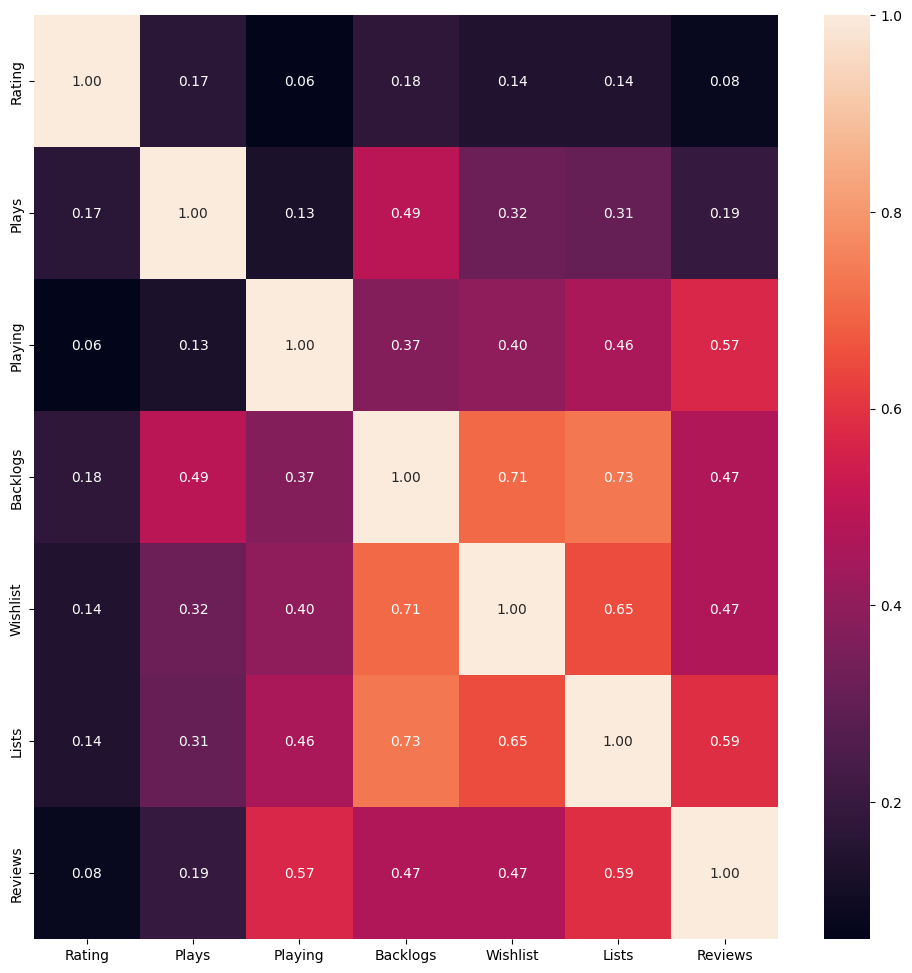

In [16]:
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, fmt=".2f")

# Playing and Reviews are in some way correlated, but not enough to drop one of them

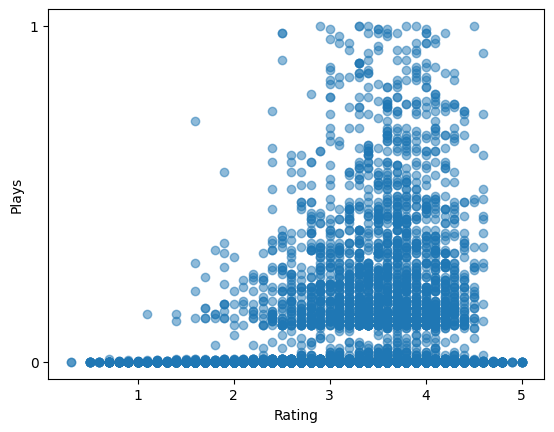

In [17]:
# Rating vs Playing
# Change playing ticks to millions
fig = plt.scatter(df['Rating'], df['Plays'], alpha=0.5)
y_ticks = [df['Plays'].min(),df['Plays'].max()]
plt.yticks(y_ticks)
plt.xlabel('Rating')
plt.ylabel('Plays')

plt.show()

Text(0, 0.5, 'Plays')

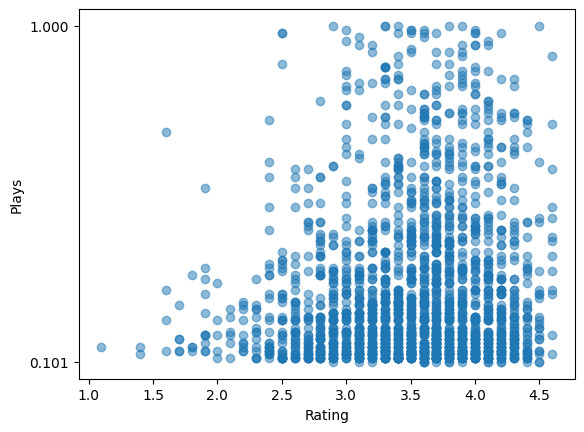

In [18]:
# Let's drop the least popular games
df = df[df['Plays'] > 0.1]


fig = plt.scatter(df['Rating'], df['Plays'], alpha=0.5)
y_ticks = [df['Plays'].min(),df['Plays'].max()]
plt.yticks(y_ticks)
plt.xlabel('Rating')
plt.ylabel('Plays')

# The chart is now better distributed

# Training the model

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Let's use TfidVectorizer to vectorize the summary column
# the max_df parameter is used to ignore words that appear in more than 80% of the documents
# the min_df parameter is used to ignore words that appear in less than 2 documents
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=2)


tfidf_model = vectorizer.fit_transform(df['Summary'])
print(f"The model contains {tfidf_model.shape[0]} games and {tfidf_model.shape[1]} words")
print(f"The dataset has {df.shape[0]} games")

The model contains 2102 games and 7334 words
The dataset has 2102 games


In [20]:
popular_terms = ['simulator','authentic','shooter']
columns = vectorizer.get_feature_names_out()
tfidf_model_df = pd.DataFrame.sparse.from_spmatrix(tfidf_model, columns=columns)
tfidf_model_df[popular_terms].sort_values(by=popular_terms, ascending=False).head(10)


,simulator,authentic,shooter
1312,0.500311,0.0,0.0
2050,0.383068,0.0,0.0
471,0.364343,0.0,0.0
1316,0.304191,0.0,0.0
2015,0.275743,0.0,0.0
1579,0.245481,0.0,0.0
616,0.236581,0.0,0.0
662,0.228565,0.0,0.0
1523,0.211392,0.0,0.0
507,0.207298,0.0,0.0


In [24]:
from sklearn.neighbors import NearestNeighbors


def get_content_based_recommendation(title, top_n=10, metric='cosine'):
    # Get the index of the game that matches the title
    # we'll use that index to locate the row in the tf-idf matrix that corresponds to that game
    idx = df[df['Title'].str.lower() == title.lower()].index[0]

    model = NearestNeighbors(n_neighbors=top_n, metric=metric)
    model.fit(tfidf_model)
    similar_games = model.kneighbors(tfidf_model[idx], return_distance=True)
    similars_df = df.iloc[similar_games[1][0]]
    similars_df['distance'] = similar_games[0][0]
    # Return the top 10 most similar games
    return similars_df

get_content_based_recommendation('God of War Ragnarök')

# 10 games that are similar to God of War

/var/folders/h1/fhrkxmnn5_q504_ffmhxrl0r0000gn/T/ipykernel_39083/3242600165.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similars_df['distance'] = similar_games[0][0]


,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,distance
26,God of War Ragnarök,"Nov 09, 2022","['SIE Santa Monica Studio', 'Sony Interactive ...",God of War: Ragnarök is the ninth installment ...,"['PlayStation 4', 'PlayStation 5']","['Adventure', 'Brawler']",4.4,0.717175,0.018652,0.291674,0.709096,0.039216,0.444444,0.000000
14,God of War,"Apr 20, 2018","['Sony Interactive Entertainment', 'SIE Santa ...",God of War is the sequel to God of War III as ...,"['Windows PC', 'PlayStation 4']","['Adventure', 'Brawler', 'RPG']",4.2,0.252533,0.260886,0.583338,0.527281,0.647059,0.629630,0.404040
345,God of War III,"Mar 16, 2010","['SIE Santa Monica Studio', 'Sony Computer Ent...","Set in the realm of brutal Greek mythology, Go...","['PlayStation 4', 'PlayStation 3']","['Adventure', 'Brawler']",4.0,0.979798,0.001630,0.166675,0.015545,0.019608,0.011074,0.613826
787,God of War: Chains of Olympus,"Mar 04, 2008","['Sony Computer Entertainment, Inc. (SCEI)', '...",The game is set in Ancient Greece and loosely ...,['PlayStation Portable'],"['Adventure', 'Brawler']",3.2,0.454551,0.001022,0.007437,0.006327,0.009157,0.006074,0.657105
290,God of War II,"Mar 13, 2007","['SCE Santa Monica Studio', 'Sony Computer Ent...","Kratos is now the God of War, having defeated ...",['PlayStation 2'],"['Adventure', 'Brawler', 'Platform']",4.0,0.111120,0.002065,0.166675,0.014563,0.215686,0.013296,0.663226
885,God of War III: Remastered,"Jul 14, 2015","['Sony Computer Entertainment', 'Red Kite Games']","Set in the realm of brutal Greek mythology, Go...",['PlayStation 4'],"['Adventure', 'Brawler']",4.0,0.323239,0.001000,0.008281,0.005054,0.007804,0.006074,0.748988
1538,God of War,"Nov 17, 2009",['Sony Computer Entertainment'],Unleash the power of the Gods and embark on a ...,"['PlayStation 3', 'PlayStation Vita']","['Adventure', 'Brawler']",3.7,0.171726,0.000522,0.002490,0.001964,0.002667,0.002407,0.764678
1005,God of War: Ascension,"Mar 12, 2013","['Sony Computer Entertainment, Inc. (SCEI)', '...",Vengeance is born in the fires of betrayal in ...,['PlayStation 3'],"['Adventure', 'Brawler']",2.9,0.313138,0.000826,0.007885,0.007509,0.007392,0.004074,0.808003
2946,God of War II,"Nov 17, 2009",['Sony Computer Entertainment'],"Kratos, the once mortal warrior turned ruthles...","['PlayStation 3', 'PlayStation Vita']","['Adventure', 'Brawler']",4.0,0.111120,0.000348,0.002260,0.001418,0.002373,0.001741,0.810617
2242,Darksiders: Warmastered Edition,"Nov 22, 2016","['Nordic Games Group', 'Kaiko']",Deceived by the forces of evil into prematurel...,"['Windows PC', 'Wii U', 'PlayStation 4', 'Xbox...","['Adventure', 'Brawler', 'Fighting', 'RPG']",3.4,0.141423,0.000870,0.009969,0.002055,0.003922,0.002259,0.839089
